<a href="https://colab.research.google.com/github/sophia-moore/232-Final-Project/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from scipy.sparse import csr_matrix
import os

In [ ]:
def run_pca(filepath, k=10, output_suffix=""):
    # 1: Load data
    data = pd.read_csv(filepath, index_col=0)

    # 2: Determine method of PCA - BoW too large to run full PCA
    use_truncated = "bow" in filepath.lower()

    if use_truncated:
        # Sparse BoW matrix
        X = csr_matrix(data.values)
        pca = TruncatedSVD(n_components=k)
        projection = pca.fit_transform(X)  # Z_train
        loadings = pca.components_.T
        sdev = np.sqrt(pca.explained_variance_)
    else:
        # GloVe matrices
        X = data.values
        pca = PCA(n_components=k)
        pca.fit(X)
        projection = pca.transform(X)  # Z_train
        loadings = pca.components_.T
        sdev = np.sqrt(pca.explained_variance_)

    # 3: Output files
    # Fix: use os.path.join to create proper file paths
    base_path = os.path.join(os.path.expanduser("~"), "OneDrive", "My Life", "Education",
                           "2025 YALE MMS", "Term_4S", "T4_E_Adv_Lin_Algebra_p2",
                           "final_project", "pca_outputs")

    # Create output directory if it doesn't exist
    os.makedirs(base_path, exist_ok=True)

    # Use f-strings to properly format the output filenames
    # Save Z_train (the projection)
    pd.DataFrame(projection).to_csv(os.path.join(base_path, f"Z_train_pca{output_suffix}"))
    pd.DataFrame(loadings).to_csv(os.path.join(base_path, f"Z_train_loadings{output_suffix}"))
    pd.DataFrame(sdev**2 / sum(sdev**2)).to_csv(os.path.join(base_path, f"Z_train_variance{output_suffix}"))

    return pca


In [ ]:
# ---------------------------------------------------------------------
# FUNCTION TO PROJECT TEST DATA ONTO TRAIN PCA
# ---------------------------------------------------------------------
def project_test_pca(
        train_path: str,
        test_path: str,
        output_name: str,
        k: int = 10,
        use_truncated: bool = False,
    ):
    """
    • Fits a PCA (or TruncatedSVD) on X_train
    • Projects both train and test sets (Z_train, Z_test)
    • Saves Z_train, Z_test, component loadings, and variance-explained to CSV
    """
    # ---------- 1. Load data -------------------------------------------------
    X_train = pd.read_csv(train_path, index_col=0).values
    X_test  = pd.read_csv(test_path,  index_col=0).values

    # ---------- 2. Output directory -----------------------------------------
    base_path = os.path.join(
        os.path.expanduser("~"), "OneDrive", "My Life", "Education",
        "2025 YALE MMS", "Term_4S", "T4_E_Adv_Lin_Algebra_p2",
        "final_project", "pca_outputs"
    )
    os.makedirs(base_path, exist_ok=True)

    # ---------- 3. Fit PCA / TruncatedSVD -----------------------------------
    if use_truncated:
        pca      = TruncatedSVD(n_components=k)
        Z_train  = pca.fit_transform(csr_matrix(X_train))
        Z_test   = pca.transform(csr_matrix(X_test))
    else:
        pca      = PCA(n_components=k)
        Z_train  = pca.fit_transform(X_train)
        Z_test   = pca.transform(X_test)

    # ---------- 4. Collect loadings & variance ------------------------------
    loadings   = pca.components_.T                         # shape: (p, k)
    sdev       = np.sqrt(pca.explained_variance_)          # std-dev of each PC
    var_ratio  = (sdev**2) / np.sum(sdev**2)               # same as var / total

    # ---------- 5. Write CSV outputs --------------------------
    pd.DataFrame(Z_train).to_csv(
        os.path.join(base_path, f"Z_train_{output_name}.csv"),
        index_label="obs"
    )
    pd.DataFrame(Z_test).to_csv(
        os.path.join(base_path, f"Z_test_{output_name}.csv"),
        index_label="obs"
    )
    pd.DataFrame(loadings).to_csv(
        os.path.join(base_path, f"Z_train_loadings_{output_name}.csv"),
        index_label="feature"
    )
    pd.DataFrame(var_ratio).to_csv(
        os.path.join(base_path, f"Z_train_variance_{output_name}.csv"),
        header=["prop_var"],
        index_label="PC"
    )

    # ---------- 6. Return objects if you need them downstream ---------------
    return pca, Z_train, Z_test, loadings, var_ratio

In [ ]:
# Load and prepare your data
project_paths = {
    'base': os.path.join(os.path.expanduser("~"), "OneDrive", "My Life", "Education",
                         "2025 YALE MMS", "Term_4S", "T4_E_Adv_Lin_Algebra_p2", "final_project"),
}

# Read and index simple avg glove files if needed
glove_avg_train = pd.read_csv(os.path.join(project_paths['base'], "glove_train_avg.csv"))
# glove_avg_train.index = range(1, len(glove_avg_train) + 1)
# glove_avg_train.to_csv("glove_train_avg.csv")

glove_avg_test = pd.read_csv(os.path.join(project_paths['base'], "glove_test_avg.csv"))
# glove_avg_test.index = range(1, len(glove_avg_test) + 1)
# glove_avg_test.to_csv("glove_test_avg.csv")


# Read and index tfidf glove files if needed
glove_tfidf_train = pd.read_csv(os.path.join(project_paths['base'], "glove_train_tfidf.csv"))
# glove_avg_train.index = range(1, len(glove_avg_train) + 1)
# glove_avg_train.to_csv("glove_train_avg.csv")

glove_tfidf_test = pd.read_csv(os.path.join(project_paths['base'], "glove_test_tfidf.csv"))
# glove_avg_test.index = range(1, len(glove_avg_test) + 1)
# glove_avg_test.to_csv("glove_test_avg.csv")


In [ ]:
glove_tfidf_test.head()

,Unnamed: 0,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,1,0.112911,0.227936,-0.038546,0.133357,0.002286,-0.127488,0.110674,-0.026333,0.008371,...,0.053713,-0.158998,0.086400,0.249740,-0.274922,0.306511,0.134330,-0.298970,0.465277,-0.171822
1,2,-0.347857,-0.230447,0.269019,-0.154157,0.213219,0.296349,-0.111857,0.196917,-0.312492,...,0.224621,-0.178098,-0.466866,0.089190,-0.406169,0.020060,-0.151358,-0.198590,0.745727,0.013808
2,3,0.113952,0.212003,0.341806,-0.196057,0.113012,-0.463120,0.235518,0.126134,-0.160559,...,0.034311,0.248835,-0.260064,-0.261224,-0.520131,0.139609,0.198704,0.011528,0.570338,-0.121885
3,4,0.031833,0.131888,0.097318,-0.018955,0.130521,-0.220714,-0.151781,0.095177,-0.078337,...,-0.199077,-0.209286,-0.190383,-0.352183,-0.327814,-0.037804,0.174876,-0.136677,0.610205,-0.008394
4,5,-0.262861,0.177789,0.207985,0.069266,0.161251,-0.152674,-0.139210,-0.066590,0.121430,...,0.100846,0.113004,0.032541,-0.216050,0.076762,0.076856,0.066629,-0.086535,0.419420,0.298025


In [ ]:
import time

# Start timing
start_time = time.time()

print("Running PCA projections...")

# RUN ON BOW MATRICES with progress indication
print("Processing Bag of Words matrices...")
bow_pca, bow_Z_train, bow_Z_test, bow_loadings, bow_var = project_test_pca(
    train_path=os.path.join(project_paths['base'], "bow_train_matrix.csv"),
    test_path=os.path.join(project_paths['base'], "bow_test_matrix.csv"),
    output_name="bow",
    k=10,
    use_truncated=True
)
bow_time = time.time() - start_time
print(f"BoW processing completed in {bow_time:.2f} seconds")

# RUN ON GLOVE TFIDF MATRICES with progress indication
print("\nProcessing GloVe AVG matrices...")
glove_avg_start_time = time.time()
glove_avg_pca, glove_avg_Z_train, glove_avg_Z_test, glove_avg_loadings, glove_avg_var = project_test_pca(
    train_path=os.path.join(project_paths['base'], "glove_train_avg.csv"),
    test_path=os.path.join(project_paths['base'], "glove_test_avg.csv"),
    output_name="glove_avg",
    k=10,
    use_truncated=False
)
glove_avg_time = time.time() - glove_avg_start_time
total_time = time.time() - start_time

# RUN ON GLOVE TFIDF MATRICES with progress indication
print("\nProcessing GloVe TFIDF matrices...")
glove_tfidf_start_time = time.time()
glove_tfidf_pca, glove_tfidf_Z_train, glove_tfidf_Z_test, glove_tfidf_loadings, glove_tfidf_var = project_test_pca(
    train_path=os.path.join(project_paths['base'], "glove_train_tfidf.csv"),
    test_path=os.path.join(project_paths['base'], "glove_test_tfidf.csv"),
    output_name="glove_tfidf",
    k=10,
    use_truncated=False
)
glove_tfidf_time = time.time() - glove_tfidf_start_time
total_time = time.time() - start_time

print("\nPCA projections complete!")
print(f"BoW Z_train shape: {bow_Z_train.shape}")
print(f"BoW Z_test shape: {bow_Z_test.shape}")
print(f"GloVe Simple Avg Z_train shape: {glove_avg_Z_train.shape}")
print(f"GloVe Simple Avg Z_test shape: {glove_avg_Z_test.shape}")
print(f"GloVe TFIDF Z_train shape: {glove_tfidf_Z_train.shape}")
print(f"GloVe TFIDF Z_test shape: {glove_tfidf_Z_test.shape}")
print(f"\nExecution times:")
print(f"BoW processing: {bow_time:.2f} seconds")
print(f"GloVe Simple Avg processing: {glove_avg_time:.2f} seconds")
print(f"GloVe TFIDF processing: {glove_tfidf_time:.2f} seconds")
print(f"Total runtime: {total_time:.2f} seconds")

Running PCA projections...
Processing Bag of Words matrices...
BoW processing completed in 37.26 seconds

Processing GloVe AVG matrices...

Processing GloVe TFIDF matrices...

PCA projections complete!
BoW Z_train shape: (8378, 10)
BoW Z_test shape: (2793, 10)
GloVe Simple Avg Z_train shape: (8378, 10)
GloVe Simple Avg Z_test shape: (2793, 10)
GloVe TFIDF Z_train shape: (8378, 10)
GloVe TFIDF Z_test shape: (2793, 10)

Execution times:
BoW processing: 37.26 seconds
GloVe Simple Avg processing: 0.25 seconds
GloVe TFIDF processing: 0.29 seconds
Total runtime: 37.81 seconds


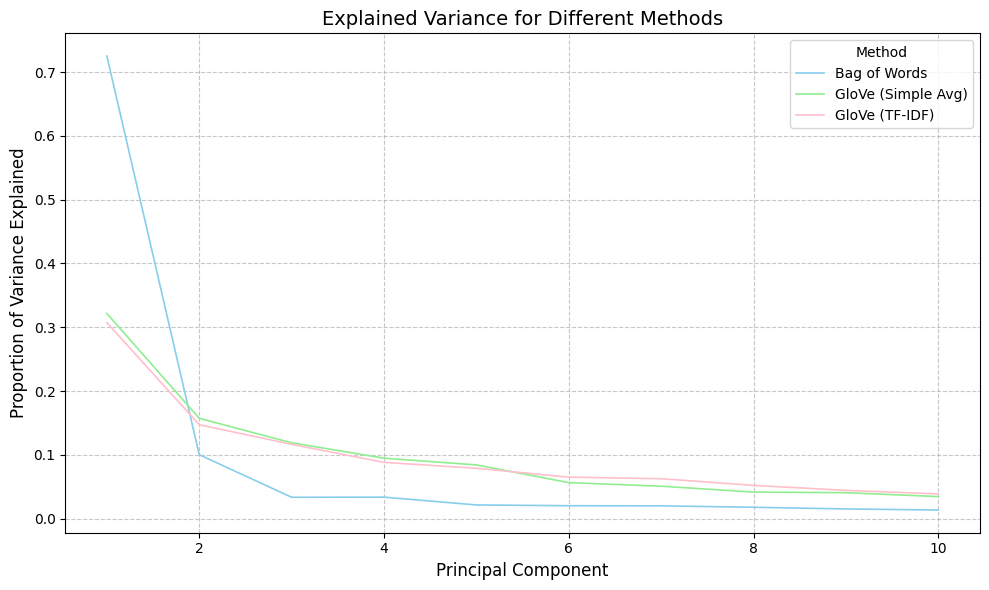

In [ ]:
# GRAPH 1: EXPLAINED VARIANCE FOR DIFFERENT METHODS
# Process each file
var_explained_bow = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\pca_outputs\Z_train_variance_bow.csv")
var_explained_bow['PC'] = range(1, len(var_explained_bow) + 1)
var_explained_bow['Method'] = "Bag of Words"

var_explained_glove_simple = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\pca_outputs\Z_train_variance_glove_avg.csv")
var_explained_glove_simple['PC'] = range(1, len(var_explained_glove_simple) + 1)
var_explained_glove_simple['Method'] = "GloVe (Simple Avg)"

var_explained_glove_tfidf = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\pca_outputs\Z_train_variance_glove_tfidf.csv")
var_explained_glove_tfidf['PC'] = range(1, len(var_explained_glove_tfidf) + 1)
var_explained_glove_tfidf['Method'] = "GloVe (TF-IDF)"

# Combine all data frames into one
all_data = pd.concat([var_explained_bow, var_explained_glove_simple, var_explained_glove_tfidf])              # var_explained_bow, var_explained_glove_tfidf])

# Plot all on the same graph
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=all_data,
    x="PC",                  # principal-component index
    y="prop_var",            # variance explained
    hue="Method",
    linewidth=1.2,
    markers=True, markersize=8,
    palette={"GloVe (TF-IDF)": "pink",
            "GloVe (Simple Avg)": "lightgreen",
            "Bag of Words":   "skyblue"}
)

plt.title("Explained Variance for Different Methods", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Proportion of Variance Explained", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("variance_explained.png")
plt.show()


   PC  cumulative_variance
0   2             0.825222
1   7             0.953751
2   6             0.802569
3   9             0.961374


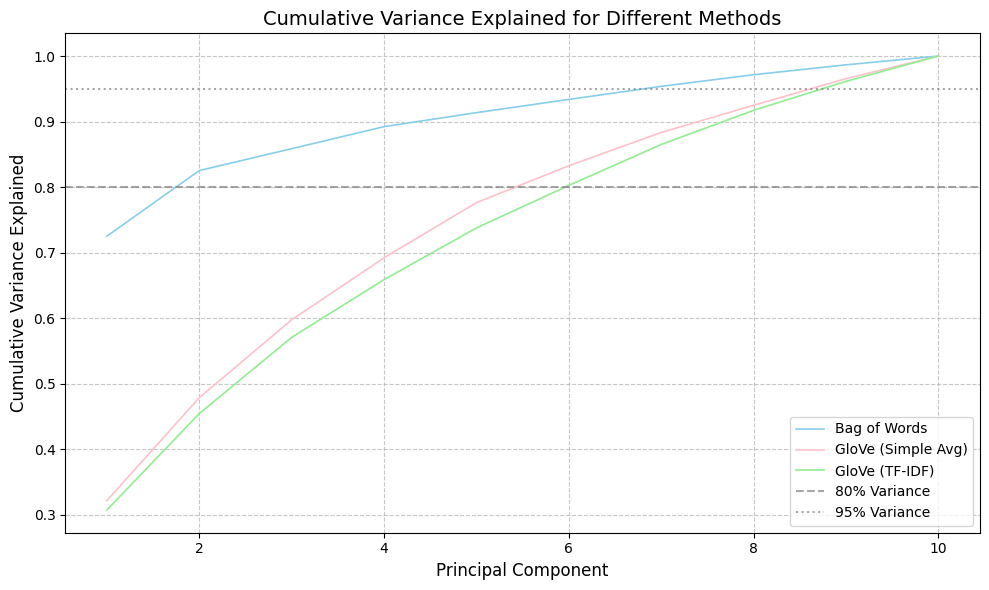

In [ ]:

# GRAPH 2: CUMULATIVE VARIANCE FOR DIFFERENT METHODS
# Compute cumulative variance explained
var_explained_bow['cumulative_variance'] = var_explained_bow['prop_var'].cumsum()
var_explained_glove_simple['cumulative_variance'] = var_explained_glove_simple['prop_var'].cumsum()
var_explained_glove_tfidf['cumulative_variance'] = var_explained_glove_tfidf['prop_var'].cumsum()

# Combine data
all_data = pd.concat([ var_explained_bow, var_explained_glove_simple, var_explained_glove_tfidf])

# Function to compute number of PCs needed for given thresholds
def num_pcs_for_variance(variance_vector, thresholds=[0.80, 0.95]):
    cumulative_variance = variance_vector.cumsum()
    return [np.argmax(cumulative_variance.values >= t) + 1 for t in thresholds]

# Compute threshold points
variance_lists = [var_explained_bow,  var_explained_glove_tfidf]
pcs_list = [num_pcs_for_variance(df['prop_var']) for df in variance_lists]
cums_list = []

for df, pcs in zip(variance_lists, pcs_list):
    cums = []
    for pc in pcs:
        cums.append(df['cumulative_variance'].iloc[pc-1])
    cums_list.append(cums)

# Flatten lists for dataframe
flat_pcs = [pc for sublist in pcs_list for pc in sublist]
flat_cums = [cum for sublist in cums_list for cum in sublist]

# Create highlight points dataframe
highlight_points = pd.DataFrame({
    'PC': flat_pcs,
    'cumulative_variance': flat_cums
})

print(highlight_points)  # print values

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='PC', y='cumulative_variance', hue='Method', linewidth=1.2, markers=True, markersize=8,
            palette={"GloVe (Simple Avg)": "pink", "GloVe (TF-IDF)": "lightgreen", "Bag of Words": "skyblue"})

# Add horizontal lines for thresholds
plt.axhline(y=0.80, linestyle='--', color='grey', alpha=0.7, label='80% Variance')
plt.axhline(y=0.95, linestyle=':', color='grey', alpha=0.7, label='95% Variance')

plt.title("Cumulative Variance Explained for Different Methods", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Cumulative Variance Explained", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title=None)
plt.tight_layout()
plt.savefig("cumulative_variance.png")
plt.show()


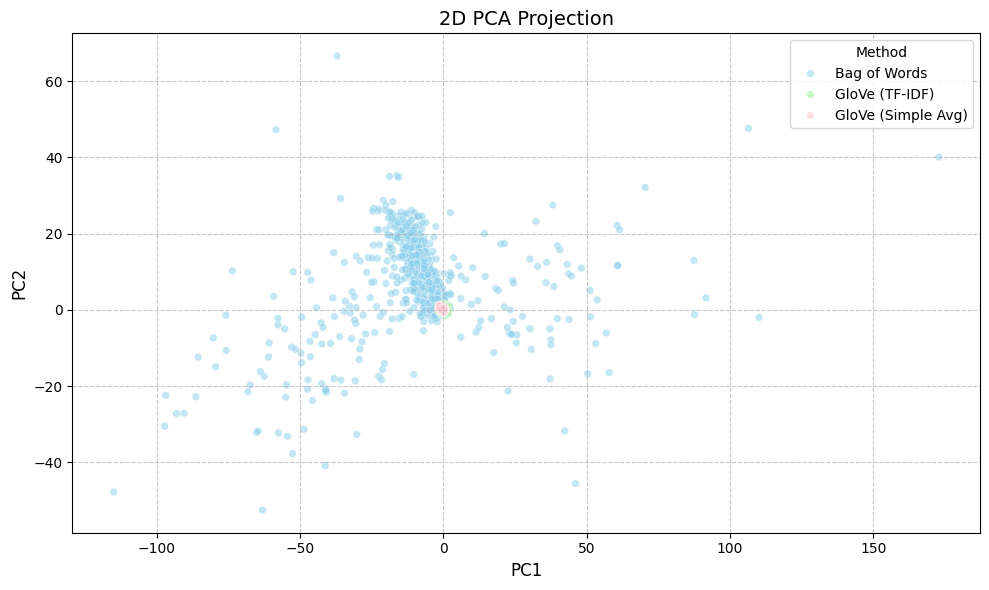

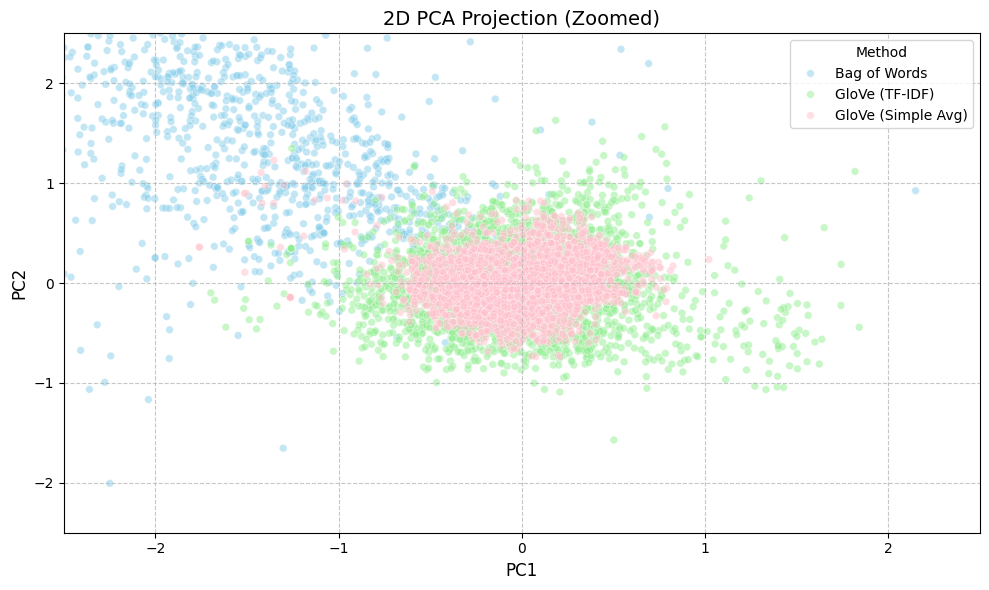

In [ ]:

# 2D SCATTERPLOT
# Load PCA projections
bow_proj = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\pca_outputs\Z_test_bow.csv")
bow_proj = bow_proj[['1', '2']]  # Select PC1 and PC2
bow_proj.columns = ['PC1', 'PC2']
bow_proj['Method'] = "Bag of Words"

glove_simple_proj = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\pca_outputs\Z_test_glove_avg.csv")
glove_simple_proj = glove_simple_proj[['1', '2']]  # Select PC1 and PC2
glove_simple_proj.columns = ['PC1', 'PC2']
glove_simple_proj['Method'] = "GloVe (Simple Avg)"

glove_tfidf_proj = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\pca_outputs\Z_test_glove_tfidf.csv")
glove_tfidf_proj = glove_tfidf_proj[['1', '2']]  # Select PC1 and PC2
glove_tfidf_proj.columns = ['PC1', 'PC2']
glove_tfidf_proj['Method'] = "GloVe (TF-IDF)"

# Combine all into one dataframe
combined_proj = pd.concat([bow_proj, glove_tfidf_proj, glove_simple_proj])

# Plot all 3
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_proj, x='PC1', y='PC2', hue='Method', alpha=0.5, s=30,
                palette={"Bag of Words": "skyblue", "GloVe (Simple Avg)":"pink", "GloVe (TF-IDF)": "lightgreen"})

plt.title("2D PCA Projection", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("2d_projection.png")
plt.show()

# Plot all 3 with zoomed axes for more visibility of GloVe
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_proj, x='PC1', y='PC2', hue='Method', alpha=0.5, s=30,
                palette={"Bag of Words": "skyblue", "GloVe (Simple Avg)":"pink", "GloVe (TF-IDF)": "lightgreen"})

plt.title("2D PCA Projection (Zoomed)", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("2d_projection_zoomed.png")
plt.show()